In [46]:
import pysam
from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
import csv
import seaborn as sns
from statannotations.Annotator import Annotator 
from adjustText import adjust_text

In [47]:
all_mean_arr=-0.017462454026226405
all_std_arr=0.006996042091888453
mean_dict_different_race={'ACB': -0.021129940274677197,
 'ASW': -0.020541364517036285,
 'BEB': -0.01690678177281044,
 'CDX': -0.01520099465128729,
 'CEU': -0.016533114461341817,
 'CHB': -0.015328450587149127,
 'CHS': -0.01553630769670323,
 'CLM': -0.017175762377800757,
 'ESN': -0.021289481956977087,
 'FIN': -0.016220012008386193,
 'GBR': -0.01616972796402513,
 'GIH': -0.016647828395962485,
 'GWD': -0.02127146261125899,
 'IBS': -0.016612028858784364,
 'ITU': -0.016483044568386403,
 'JPT': -0.015297644767223825,
 'KHV': -0.015510621661266998,
 'LWK': -0.020977118301868332,
 'MSL': -0.021221971390719675,
 'MXL': -0.016358508148574633,
 'PEL': -0.015192057641423692,
 'PJL': -0.016650973867877568,
 'PUR': -0.01772660210939756,
 'STU': -0.016488613724290634,
 'TSI': -0.016378152064038587,
 'YRI': -0.021395734138643974}
std_dict_different_race={'ACB': 0.007866911384050993,
 'ASW': 0.007845222560823078,
 'BEB': 0.007884710711424594,
 'CDX': 0.007874313523803581,
 'CEU': 0.007927585629080875,
 'CHB': 0.007946756589325447,
 'CHS': 0.00794164324551959,
 'CLM': 0.007812970518334978,
 'ESN': 0.00785082325216948,
 'FIN': 0.007906254940044924,
 'GBR': 0.007932404777081037,
 'GIH': 0.007873289737229847,
 'GWD': 0.007853536883558044,
 'IBS': 0.007919548085211019,
 'ITU': 0.007768497466178242,
 'JPT': 0.00796914647357699,
 'KHV': 0.007990414654274063,
 'LWK': 0.007797858211516251,
 'MSL': 0.007864701129783158,
 'MXL': 0.007798067190318037,
 'PEL': 0.007722619015518075,
 'PJL': 0.007712973460516593,
 'PUR': 0.007785891217808583,
 'STU': 0.0077724707332740475,
 'TSI': 0.00791282517960449,
 'YRI': 0.007915268495722334}

In [48]:
mhc_race_positions_dict={'ACB': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},

 'ASW': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [31052133, 31528792],
   [32212726, 32882258]]},
 'BEB': {'mhc': [[29720403, 30048796],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'CDX': {'mhc': [[30994370, 31528792], [32212726, 32923168]]},
 'CEU': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'CHB': {'mhc': [[29720403, 29913914],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'CHS': {'mhc': [[30994370, 31528792], [32397207, 32882258]]},
 'CLM': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'ESN': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32397207, 32882258]]},
 'FIN': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'GBR': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'GIH': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'GWD': {'mhc': [[29720403, 30120966],
   [31052133, 31528792],
   [32212726, 32882258]]},
 'IBS': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'ITU': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32923168]]},
 'JPT': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'KHV': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32397207, 32923168]]},
 'LWK': {'mhc': [[29720403, 30011739],
   [31052133, 31528792],
   [32212726, 32923168]]},
 'MSL': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'MXL': {'mhc': [[29720403, 29913914],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'PEL': {'mhc': [[29720403, 29896285],
   [30959575, 31528792],
   [32288923, 32882258]]},
 'PJL': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32923168]]},
 'PUR': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'STU': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'TSI': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'YRI': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32212726, 32882258]]}}

In [49]:

#mhc complementary region
mhc_complementary_region=[[29720403, 30048796],[30994370, 31528792],[32212726, 32882258]]

In [50]:
split_race_region={'ACB': {},
 'ASW': {},
 'BEB': {'split_chr3/xav': [[98046342, 98273693]]},
 'CDX': {'split_chr13/xai': [[55102733, 55443491]]},
 'CEU': {'split_chr17/xaj': [[45670177, 46418024]]},
 'CHB': {},
 'CHS': {'split_chr3/xav': [[98046342, 98273693]]},
 'CLM': {'split_chr17/xaj': [[45836662, 46224960]],
  'split_chr3/xav': [[98046342, 98273693]]},
 'ESN': {'split_chr5/xai': [[34264948, 34562837]]},
 'FIN': {},
 'GBR': {'split_chr1/xbt': [[226978066, 227352188]],
  'split_chr17/xaj': [[45670177, 46418024]],
  'split_chr3/xav': [[98046342, 98273693]]},
 'GIH': {'split_chr3/xav': [[98046342, 98276757]]},
 'GWD': {},
 'IBS': {'split_chr17/xaj': [[45670177, 46418024]],
  'split_chr3/xav': [[98046342, 98273693]]},
 'ITU': {'split_chr17/xak': [[52575391, 52889013]]},
 'JPT': {},
 'KHV': {},
 'LWK': {},
 'MSL': {'split_chr5/xai': [[34264948, 34562837]]},
 'MXL': {'split_chr1/xbt': [[227016487, 227352188]],
  'split_chr3/xav': [[98046342, 98273693]]},
 'PEL': {'split_chr11/xaf': [[23168664, 23564494]],
  'split_chr3/xav': [[98046342, 98276757]]},
 'PJL': {},
 'PUR': {'split_chr17/xaj': [[45836662, 46418024]],
  'split_chr3/xav': [[98046342, 98276757]]},
 'STU': {'split_chr13/xai': [[55102733, 55443491]],
  'split_chr3/xav': [[98046342, 98273693]]},
 'TSI': {'split_chr17/xaj': [[45670177, 46418024]]},
 'YRI': {}}

In [51]:
fileName = '../../1000_population.tsv'


lines = []
categories = []
samplenames=[]

with open(fileName, 'r') as f:
    text = f.read()

lines = text.split('\n')
for l in lines:
    samplenames.append(l.split('\t')[0])
    categories.append(l.split('\t')[-1])
allcategories=sorted(list(set(categories)))


In [52]:
def getmaxindex(arr,num):
    max_values_and_indices = sorted(enumerate(arr), key=lambda x: x[1])[:num]


    max_indices = [index for index, value in max_values_and_indices]    
    return max_indices

In [53]:
import re
def getinteger(s):
    match = re.search(r'chr(\d+)', s)

    if match:
        return match.group(1)


In [54]:
allrecords=[]

In [55]:
# mhccsv = pd.read_csv("../../similar_region_csvfiles/posmhc.csv")
# allrigion_P_top_1000=[]
# for region in mhc_complementary_region:

#     mhccsv_P_list = mhccsv[(mhccsv["Unnamed: 0"] >= region[0]) & (mhccsv["Unnamed: 0"] <= region[1])]["P"].to_list()
#     allrigion_P_top_1000+=mhccsv_P_list
# #allrigion_P_top_1000_index=getmaxindex(allrigion_P_top_1000,1000)
# sortedlist=sorted(allrigion_P_top_1000)
# print(sortedlist)
# top_1000=sortedlist[:1000]
# for i in top_1000:
    
#     arr=[]
#     arr.append("Disassortative mating MHC region")
#     arr.append("All")
# # pvalue=stats.norm.cdf(i, all_mean_arr, all_std_arr)
#     arr.append(i)
#     allrecords.append(arr)
# # sortedlist=allrigion_P_top_1000.sort(reverse=True)
# # top_1000=sortedlist[:1000]
# # mean_of_top_1000 = sum(top_1000) / len(top_1000)
# # allrecords.append(["MHC complementary region","Allaverage",mean_of_top_1000])

    



In [56]:
mhcracecsv=pd.read_csv("../../similar_region_race/mhc.csv")

for race in allcategories:
    all_different_race_region_top_1000=[]
    if mhc_race_positions_dict[race]!={}:
        for region in mhc_race_positions_dict[race]["mhc"]:
            mhccsv_P_list = mhcracecsv[(mhcracecsv["Unnamed: 0"] >= region[0]) & (mhcracecsv["Unnamed: 0"] <= region[1])][race].to_list()
            all_different_race_region_top_1000+=mhccsv_P_list
            #print(all_different_race_region_top_1000)
        sortedlist=sorted(all_different_race_region_top_1000)
        top_1000=sortedlist[:1000]
        for i in top_1000:
            
            arr=[]
            arr.append("Negative-assortative mating MHC regions")
            arr.append(race)
        # pvalue=stats.norm.cdf(i, mean_dict_different_race[race], std_dict_different_race[race])
            arr.append(i)
            allrecords.append(arr)

        

In [57]:

for k,vs in split_race_region.items():
    all_different_race_nonregion_top_1000=[]
    for key, value in vs.items():
        chr=getinteger(key)
        midstr=key.split("/")[0]+"_"+key.split("/")[1]
        filename=midstr+".csv"
        split_region_df=pd.read_csv("../../similar_region_race/"+filename)
        for region in value:
            split_region_P_list=split_region_df[(split_region_df["Unnamed: 0"]>=region[0]) & (split_region_df["Unnamed: 0"]<=region[1])][race].to_list()
            all_different_race_nonregion_top_1000+=split_region_P_list

    sortedlist=sorted(all_different_race_nonregion_top_1000)
    top_1000=sortedlist[:1000]
    for i in top_1000:
        
        arr=[]
        arr.append("Negative-assortative mating non-MHC regions")
        arr.append(k)
        #  pvalue=stats.norm.cdf(i, mean_dict_different_race[race], std_dict_different_race[race])
        arr.append(i)
        allrecords.append(arr)




In [58]:
def generatedf(columns,allrecords):
    dictforDF=dict()
    for i in range(len(columns)):
        midarr=[]
        for record in allrecords:           
            midarr.append(record[i])
        dictforDF[columns[i]]=midarr
    #dataframe(dictforDF).to_csv("../formalcsvs/csv2newnew_withall.csv")
    return dataframe(dictforDF)

In [59]:
samplesdf=generatedf(columns=["iscomplementary","Race","Pvalue"],allrecords=allrecords)


In [60]:
samplesdf

,iscomplementary,Race,Pvalue
0,Negative-assortative mating MHC regions,ACB,-0.381050
1,Negative-assortative mating MHC regions,ACB,-0.381050
2,Negative-assortative mating MHC regions,ACB,-0.380767
3,Negative-assortative mating MHC regions,ACB,-0.380034
4,Negative-assortative mating MHC regions,ACB,-0.379818
...,...,...,...
41995,Negative-assortative mating non-MHC regions,TSI,-0.040478
41996,Negative-assortative mating non-MHC regions,TSI,-0.040478
41997,Negative-assortative mating non-MHC regions,TSI,-0.040478
41998,Negative-assortative mating non-MHC regions,TSI,-0.040478


In [61]:
orders=[]
for race in allcategories:
    if mhc_race_positions_dict[race]!={} and split_race_region[race]!={}:
        orders.append(race)
orders

['BEB',
 'CDX',
 'CEU',
 'CHS',
 'CLM',
 'ESN',
 'GBR',
 'GIH',
 'IBS',
 'ITU',
 'MSL',
 'MXL',
 'PEL',
 'PUR',
 'STU',
 'TSI']

In [62]:
significanceComparisons=[]
#significanceComparisons.append((('All','Disassortative mating MHC region')))
for race in orders:
    t1=(race,"Negative-assortative mating MHC regions")
    t2=(race,"Negative-assortative mating non-MHC regions")
    significanceComparisons.append((t1,t2))


In [63]:
significanceComparisons

[(('BEB', 'Negative-assortative mating MHC regions'),
  ('BEB', 'Negative-assortative mating non-MHC regions')),
 (('CDX', 'Negative-assortative mating MHC regions'),
  ('CDX', 'Negative-assortative mating non-MHC regions')),
 (('CEU', 'Negative-assortative mating MHC regions'),
  ('CEU', 'Negative-assortative mating non-MHC regions')),
 (('CHS', 'Negative-assortative mating MHC regions'),
  ('CHS', 'Negative-assortative mating non-MHC regions')),
 (('CLM', 'Negative-assortative mating MHC regions'),
  ('CLM', 'Negative-assortative mating non-MHC regions')),
 (('ESN', 'Negative-assortative mating MHC regions'),
  ('ESN', 'Negative-assortative mating non-MHC regions')),
 (('GBR', 'Negative-assortative mating MHC regions'),
  ('GBR', 'Negative-assortative mating non-MHC regions')),
 (('GIH', 'Negative-assortative mating MHC regions'),
  ('GIH', 'Negative-assortative mating non-MHC regions')),
 (('IBS', 'Negative-assortative mating MHC regions'),
  ('IBS', 'Negative-assortative mating non

In [64]:
samplesdf.to_csv("pic4_samples_df.csv")

In [65]:
samplesdf = samplesdf.rename(columns={'Pvalue': 'P'})


In [66]:
samplesdf

,iscomplementary,Race,P
0,Negative-assortative mating MHC regions,ACB,-0.381050
1,Negative-assortative mating MHC regions,ACB,-0.381050
2,Negative-assortative mating MHC regions,ACB,-0.380767
3,Negative-assortative mating MHC regions,ACB,-0.380034
4,Negative-assortative mating MHC regions,ACB,-0.379818
...,...,...,...
41995,Negative-assortative mating non-MHC regions,TSI,-0.040478
41996,Negative-assortative mating non-MHC regions,TSI,-0.040478
41997,Negative-assortative mating non-MHC regions,TSI,-0.040478
41998,Negative-assortative mating non-MHC regions,TSI,-0.040478


ITU_Negative-assortative mating MHC regions vs. ITU_Negative-assortative mating non-MHC regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=6.247e+03
MSL_Negative-assortative mating MHC regions vs. MSL_Negative-assortative mating non-MHC regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=6.571e+03
MXL_Negative-assortative mating MHC regions vs. MXL_Negative-assortative mating non-MHC regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.224e-245 U_stat=6.828e+04


PEL_Negative-assortative mating MHC regions vs. PEL_Negative-assortative mating non-MHC regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.839e-204 U_stat=1.065e+05
PUR_Negative-assortative mating MHC regions vs. PUR_Negative-assortative mating non-MHC regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.658e-297 U_stat=2.413e+04
STU_Negative-assortative mating MHC regions vs. STU_Negative-assortative mating non-MHC regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=9.502e+03
TSI_Negative-assortative mating MHC regions vs. TSI_Negative-assortative mating non-MHC regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=3.081e+03
IBS_Negative-assortative mating MHC regions vs. IBS_Negative-assortative mating non-MHC regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.397e-265

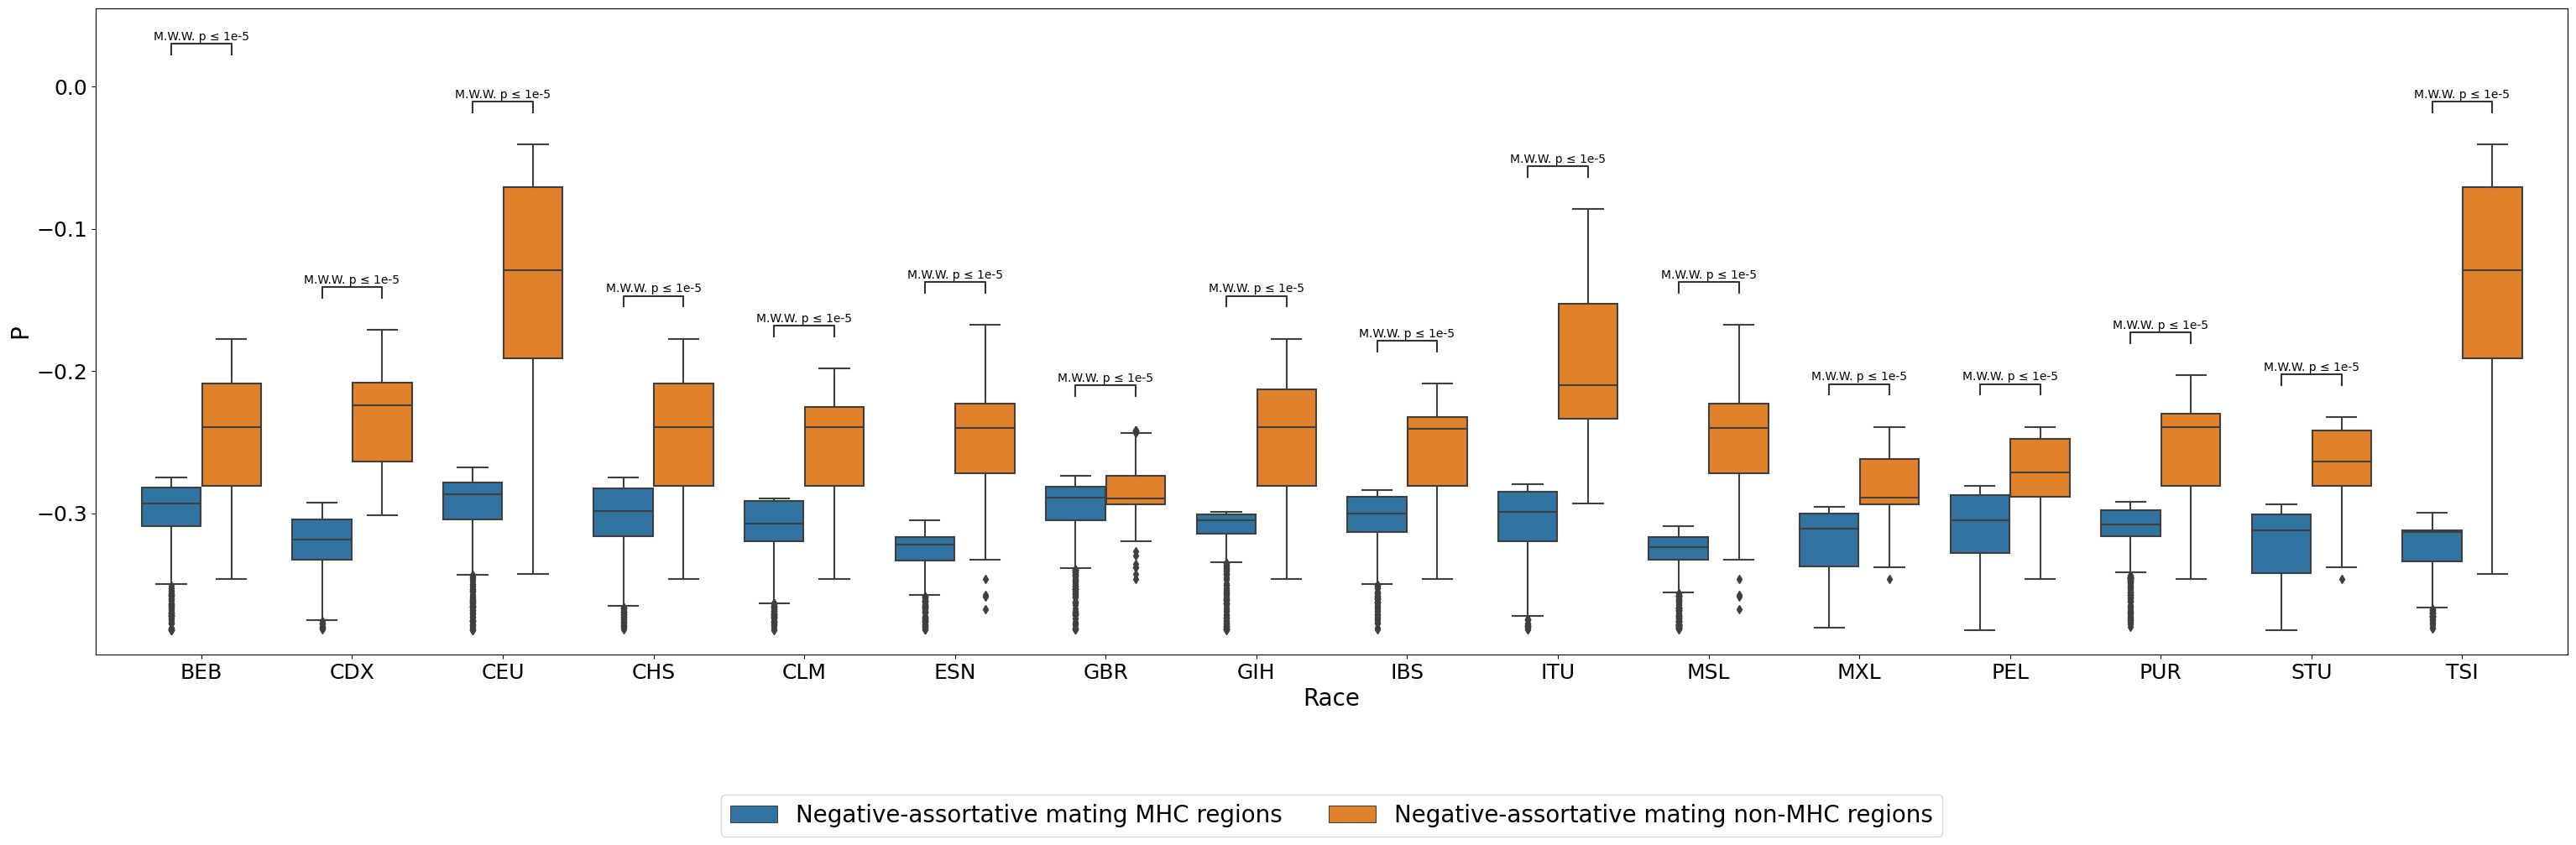

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

pairs = significanceComparisons
plt.figure(figsize=(38, 10))
fig_args = {'x': 'Race',
            'y': 'P',
            'hue': 'iscomplementary',
            'data': samplesdf,
            'order': orders,
            'hue_order': ['Negative-assortative mating MHC regions', 'Negative-assortative mating non-MHC regions'],
            'dodge': True}

configuration = {'test': 'Mann-Whitney',
                 'text_format': 'simple',
                 'comparisons_correction':"fdr_bh", 
                 'correction_format':"replace"
                 }

ax = sns.boxplot(**fig_args)

annotator = Annotator(ax, pairs, **fig_args)
annotator.configure(**configuration)
annotator.apply_test()
annotator.annotate()


ax.tick_params(axis='both', labelsize=18)
ax.set_xlabel("Race",fontsize=20)
ax.set_ylabel("P",fontsize=20)

# adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2,fontsize=20)
plt.savefig('pic4.png', dpi=300, bbox_inches='tight')
plt.savefig('pic4_sim.pdf')
